In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family = 'Malgun Gothic')

apart = pd.read_csv('apart.csv')

In [3]:
apart = apart.query('계약년도 > 2009')

In [4]:
# 거래금액 ,지우고 int로 바꾸기
apart['거래금액'] = apart['거래금액'].apply(lambda x : int(x.replace(',','')))
apart.head()

,구,단지[준공년도],준공년도,계약년도,계약일,건물전용면적(㎡),층,거래금액
10272,성북,경남,[1999],2010.0,1.01,59.59,21,24400
13116,성북,경남,[1999],2010.0,11.15,45.77,17,19450
13117,성북,경남,[1999],2010.0,12.09,50.45,6,16000
13118,성북,경남,[1999],2010.0,1.01,59.59,21,24400
13119,성북,경남,[1999],2010.0,3.24,59.59,16,25200


In [5]:
# 단지열 이름 바꾸기
apart.rename(columns = {apart.columns[1]:'단지'}, inplace = True)

In [6]:
# 계약년도 문자열로 바꾸기
apart['계약년도'] = apart['계약년도'].apply(lambda x : str(int(x)))

In [7]:
# 계약일에서 월 추출 + 2자리로 맞추기
apart['계약월'] = apart['계약일'].apply(lambda x : '{0:02d}'.format(int(str(x).split('.')[0])))
apart['계약일'] = apart['계약일'].apply(lambda x : '{0:02d}'.format(int(str(x).split('.')[1])))

In [8]:
# 계약시기 만들기
apart['계약시기'] = apart['계약년도'] + '.' + apart['계약월'] + '.' + apart['계약일']
apart['계약시기'] = apart.계약시기.apply(lambda x : x.replace('.','-'))
apart.head()

,구,단지,준공년도,계약년도,계약일,건물전용면적(㎡),층,거래금액,계약월,계약시기
10272,성북,경남,[1999],2010,01,59.59,21,24400,01,2010-01-01
13116,성북,경남,[1999],2010,15,45.77,17,19450,11,2010-11-15
13117,성북,경남,[1999],2010,09,50.45,6,16000,12,2010-12-09
13118,성북,경남,[1999],2010,01,59.59,21,24400,01,2010-01-01
13119,성북,경남,[1999],2010,24,59.59,16,25200,03,2010-03-24


In [9]:
apart_time = apart.query('단지 == "월곡두산위브"')[['계약시기','거래금액']]
apart_time = apart_time.drop_duplicates(['계약시기','거래금액'], keep="first")

In [10]:
apart_time

,계약시기,거래금액
14314,2010-01-16,32900
14315,2010-01-02,33000
14316,2010-01-24,30000
14317,2010-01-28,31450
14318,2010-02-01,32300
...,...,...
55408,2020-06-02,73500
55409,2020-06-27,76000
55410,2020-06-28,79500
55411,2020-06-29,79500


In [11]:
apart_time = apart_time.groupby('계약시기')['거래금액'].agg(lambda x : round(x.mean(),0)).reset_index().sort_values(by = '계약시기')

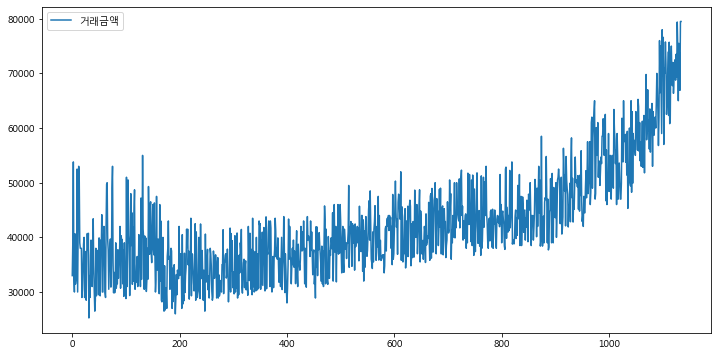

In [19]:
plt.figure(figsize = (12,6))

ax1 = plt.subplot(1,1,1)
apart_time.plot(ax = ax1)

In [85]:
apart_time.to_csv('apart_time_day.csv',index = False)

C:\Users\user2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


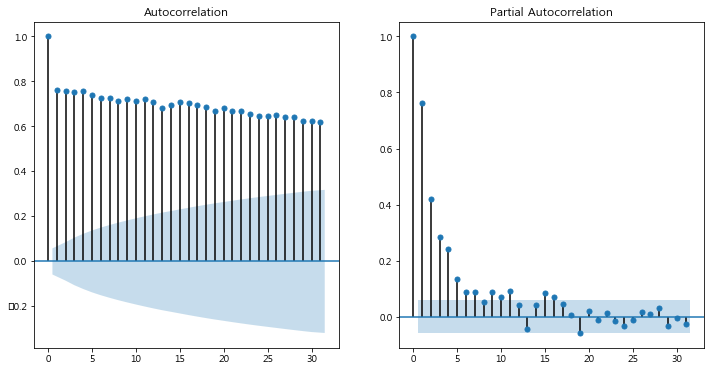

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,6))

ax1 = plt.subplot(1,2,1)
plot_acf(apart_time['거래금액'],ax = ax1)

ax2 = plt.subplot(1,2,2)
plot_pacf(apart_time['거래금액'],ax = ax2)

plt.show()

C:\Users\user2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


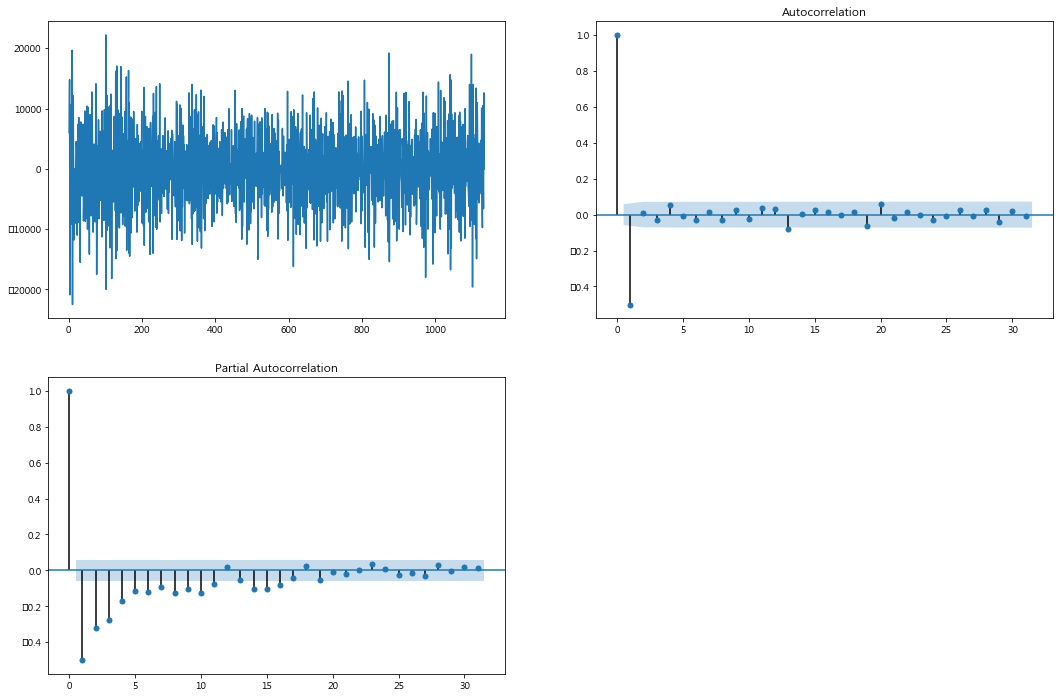

In [32]:
diff_1 = apart_time['거래금액'].diff(periods=1).iloc[1:]

plt.figure(figsize=(18,12))
ax1 = plt.subplot(2,2,1)
diff_1.plot(ax = ax1)

ax2 = plt.subplot(2,2,2)
plot_acf(diff_1, ax = ax2)

ax3 = plt.subplot(2,2,3)
plot_pacf(diff_1, ax = ax3)


plt.show()

In [34]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(apart_time['거래금액'], order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.거래금액   No. Observations:                 1134
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -11264.135
Method:                       css-mle   S.D. of innovations           4980.860
Date:                Fri, 17 Jul 2020   AIC                          22534.270
Time:                        02:09:40   BIC                          22549.371
Sample:                             1   HQIC                         22539.974
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           30.7142     12.610      2.436      0.015       5.999      55.430
ma.L1.D.거래금액    -0.9156      0.012    -78.057      0.000      -0.939      -0.893
                                    Roots   

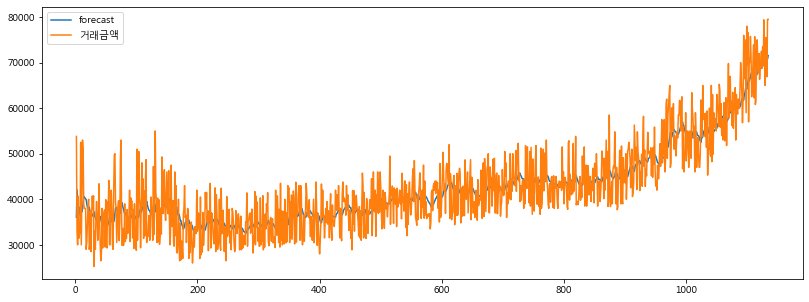

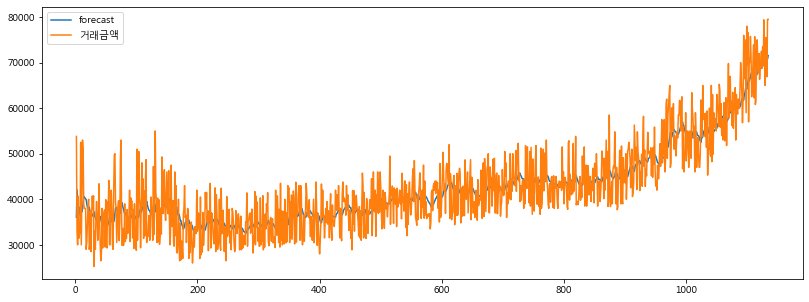

In [35]:
plt.figure(figsize=(30,5))
ax1 = plt.subplot(1,2,1)
model_fit.plot_predict(ax=ax1)

In [36]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([72251.45660888]), array([4980.86023741]), array([[62489.14993152, 82013.76328624]]))


In [80]:
(67000+72200+85500)/3

74900.0

In [37]:
! pip install pmdarima

In [38]:
from pmdarima.arima import auto_arima